# Normal Distribution and Z Score: Math and statistics for data science

In [1]:
import pandas as pd
import seaborn as sn

In [2]:
df= pd.read_csv("weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [5]:
df.shape

(10000, 3)

In [6]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

## Normal Distribution (Gaussian Distribution)

<AxesSubplot:xlabel='Height', ylabel='Count'>

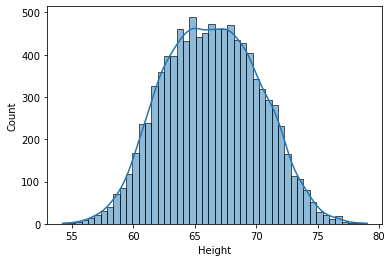

In [7]:
sn.histplot(df.Height,kde=True)

In [8]:
mean= df.Height.mean()
mean

66.36755975482106

In [9]:
std_deviation =df.Height.std()
std_deviation

3.8475281207732324

In [10]:
mean_std_less=mean-3*std_deviation
mean_std_less

54.82497539250136

In [11]:
mean_std_more=mean+3*std_deviation
mean_std_more

77.91014411714076

In [12]:
df[(df.Height<mean_std_less)|(df.Height>mean_std_more) ]    #| means or

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [13]:
df_no_outlier= df[(df.Height>mean_std_less)&(df.Height<mean_std_more) ] 
df_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [14]:
df_no_outlier.shape

(9993, 3)

In [15]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Count'>

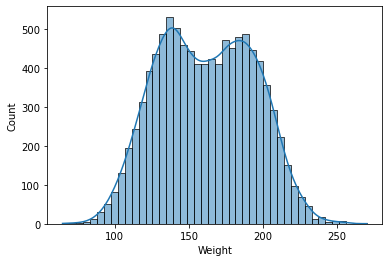

In [16]:
sn.histplot(df.Weight,kde=True)

In [17]:
mean= df.Weight.mean()
mean

161.44035683283076

In [18]:
std= df.Weight.std()
std

32.108439006519546

In [19]:
mean_std_less=mean-3*std
mean_std_less

65.11503981327212

In [20]:
mean_std_more=mean+3*std
mean_std_more

257.7656738523894

In [21]:
df[(df.Weight<mean_std_less)|(df.Weight>mean_std_more) ] 

,Gender,Height,Weight
2014,Male,78.998742,269.989699
9285,Female,54.263133,64.700127


In [22]:
df_no_outlier= df[(df.Weight>mean_std_less)&(df.Weight<mean_std_more) ] 
df_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [23]:
df_no_outlier.shape

(9998, 3)

**(2) Outlier detection and removal using Z Score**

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score

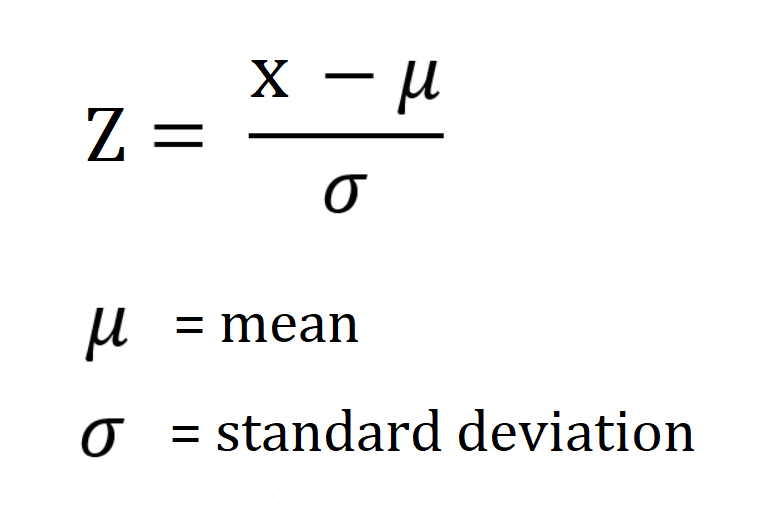

In [24]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [25]:
df.Height.mean()

66.36755975482106

In [26]:
df.Height.std()

3.8475281207732324

In [27]:
(73.847017-66.36755975482106)/3.8475281207732324

1.94396428314494

In [28]:
df[df.zscore>3] # filter 

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [29]:
df[df.zscore<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [30]:
df[(df.zscore>3)|(df.zscore<-3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [31]:
df_outlier=df[(df.zscore<3)&(df.zscore>-3)]
df_outlier

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [32]:
df_outlier.shape


(9993, 4)

In [33]:
df['zscore_Weight'] = ( df.Weight - df.Weight.mean() ) / df.Weight.std()
df

,Gender,Height,Weight,zscore,zscore_Weight
0,Male,73.847017,241.893563,1.943964,2.505672
1,Male,68.781904,162.310473,0.627505,0.027099
2,Male,74.110105,212.740856,2.012343,1.597726
3,Male,71.730978,220.042470,1.393991,1.825131
4,Male,69.881796,206.349801,0.913375,1.398680
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658,-0.768113
9996,Female,67.067155,170.867906,0.181830,0.293616
9997,Female,63.867992,128.475319,-0.649655,-1.026678
9998,Female,69.034243,163.852461,0.693090,0.075124


In [34]:
df_outlier=df[(df.zscore<3)&(df.zscore>-3)]
df_outlier.zscore_Weight.head(5)

0    2.505672
1    0.027099
2    1.597726
3    1.825131
4    1.398680
Name: zscore_Weight, dtype: float64